В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def train_model_show_rmse(inputs, targets):
    model = LinearRegression().fit(inputs, targets)
    predictions = model.predict(inputs)
    loss = mean_squared_error(targets, predictions, squared=False)
    print('Loss (RMSE):', loss)
    return model

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [3]:
df = pd.read_csv("cars.csv")
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [5]:
df.describe()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


In [6]:
df['Brand'].value_counts()

Ford          11
Hyundai       11
Tata          11
Toyota        10
Volkswagen    10
Audi          10
BMW           10
Mercedes      10
Honda          6
Maruti         6
Mahindra       5
Name: Brand, dtype: int64

In [7]:
df['Model'].value_counts()

Mustang          3
Altroz           3
C-Class          3
Verna            3
Fortuner         2
S-Cross          2
Vitara           2
WR-V             2
Ameo             2
A3               2
7 Series         2
GLE              2
Yaris            2
Ranger           2
Santro           2
Tigor            2
T-Roc            2
BR-V             2
Elantra          2
Q7               2
X5               2
GLA              2
Camry            2
Venue            2
Tiago            2
XUV300           2
Vento            2
A5               2
3 Series         2
Innova Crysta    2
Safari           2
EcoSport         2
Aspire           2
E-Class          2
X3               2
A6               2
Passat           2
Thar             2
Creta            1
Swift            1
Sonata           1
Nexon            1
Scorpio          1
Polo             1
A4               1
X1               1
Endeavour        1
City             1
Harrier          1
Ertiga           1
Civic            1
Tiguan           1
Q3          

In [8]:
df['Fuel_Type'].value_counts()

Petrol    52
Diesel    48
Name: Fuel_Type, dtype: int64

In [9]:
df['Transmission'].value_counts()

Automatic    57
Manual       43
Name: Transmission, dtype: int64

In [10]:
df['Owner_Type'].value_counts()

First     44
Second    43
Third     13
Name: Owner_Type, dtype: int64

**Висновок**:
В наборі даних по машинах у нас присутні айдішник машини, а також 7 числових (Year, Kilometers_Drive, Mileage, Engine, Power, Seats, Price) і 5 категоріальних колонок з них:
- 2 бінарні (мають лише два значення) - Fuel_Type (бувають Petrol, Diesel) та Transmission (бувають Automatic, Manual)
- 2 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку. А саме Brand (11 різних брендів від Hyundai до BMW) та Model (від Elantra до X5).
- 1 колонка, в якій можна встановити відношення порядку Owner_type (First, Second, Third)

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [11]:
X, y = df.loc[:, ~df.columns.isin(['Price', 'Car_ID'])], df['Price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [13]:
# Кодуємо Fuel_Type
fuel_codes = {'Diesel': 0, 'Petrol': 1}
df['Fuel_Type_Code'] = df['Fuel_Type'].map(fuel_codes)

In [14]:
# Кодуємо Transmission
transmission_codes = {'Manual': 0, 'Automatic': 1}
df['Transmission_Code'] = df['Transmission'].map(transmission_codes)

In [15]:
# Кодуємо Model
frequency_encoding_model = df['Model'].value_counts().to_dict()
df['Model_Code'] = df['Model'].map(frequency_encoding_model)

In [16]:
# Знову розбиваємо на трейн і тест, бо попередньо оновили датафрейм
X, y = df.loc[:, ~df.columns.isin(['Price', 'Car_ID'])], df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [18]:
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])
enc.categories_

one_hot = enc.transform(X_train[['Brand']]).toarray()
X_train[enc.categories_[0]] = one_hot

one_hot_test = enc.transform(X_test[['Brand']]).toarray()
X_test[enc.categories_[0]] = one_hot_test

In [19]:
# Кодуємо Owner_Type
ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [20]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Model_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Model_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [21]:
df_train_numeric = pd.concat([X_train.select_dtypes(exclude=['object']), y_train], axis=1)

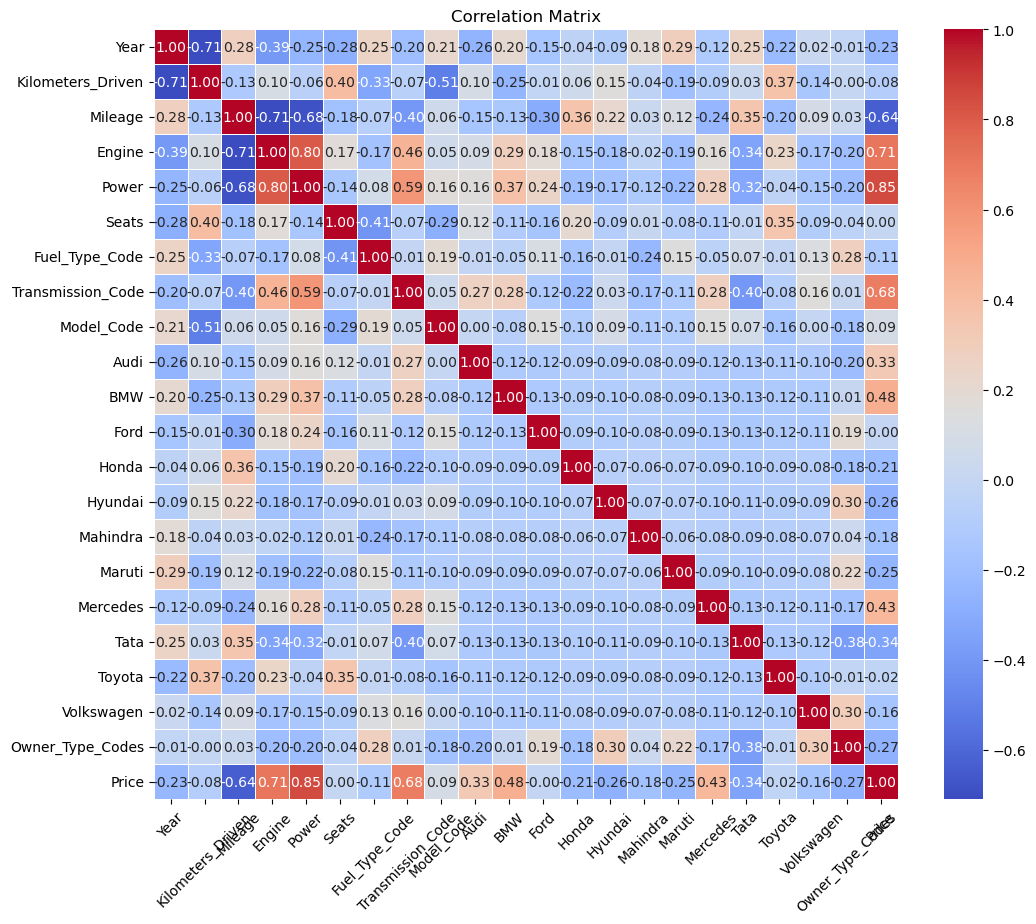

In [22]:
corr_matrix = df_train_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Рахуємо коефіцієнт корреляції усіх фічей до таргету
cor_target = abs(corr_matrix["Price"])

# Подивимось на фічі з кореляцією більше 50% до таргету
relevant_features = cor_target[(cor_target > 0.50) & (cor_target < 1.0)]
relevant_features

Mileage              0.638404
Engine               0.710561
Power                0.849137
Transmission_Code    0.680731
Name: Price, dtype: float64

**Висновок**
Бачимо, що найбільше корелює до ціни автомобіля параметр Power (кореляція 85%). Це означає, що чим більш потужний двигун, тим дорожча машина. Так само і з параметром Engine (кореляція 71%), чим кращий двигун, тим дорожча машина. Від'ємну кореляцію має Mileage (64%), чим менший пробіг, тим дорожча машина. По параметру Transmission_Code також є кореляція (68%), для автоматичної коробки передач - ціна вижча.

Також бачимо, що деякі змінні також корелюють між собою, наприклад найвищу кореляцію серед змінних мають Power та Engine - кореляція 80%, але це не 95%, тому видаляти їх не будемо. 

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [24]:
X_train = X_train.select_dtypes(exclude=['object'])
X_test = X_test.select_dtypes(exclude=['object'])

In [25]:
model = LinearRegression().fit(X_train, y_train)
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)
loss_train = mean_squared_error(y_train, predictions_train, squared=False)
loss_test = mean_squared_error(y_test, predictions_test, squared=False)
print('Train Loss (RMSE):', loss_train)
print('Test Loss (RMSE):', loss_test)

Train Loss (RMSE): 210238.30332885552
Test Loss (RMSE): 259546.04008254487


In [26]:
df['Price'].mean(), df['Price'].max(), df['Price'].min()

(1574000.0, 4000000, 450000)

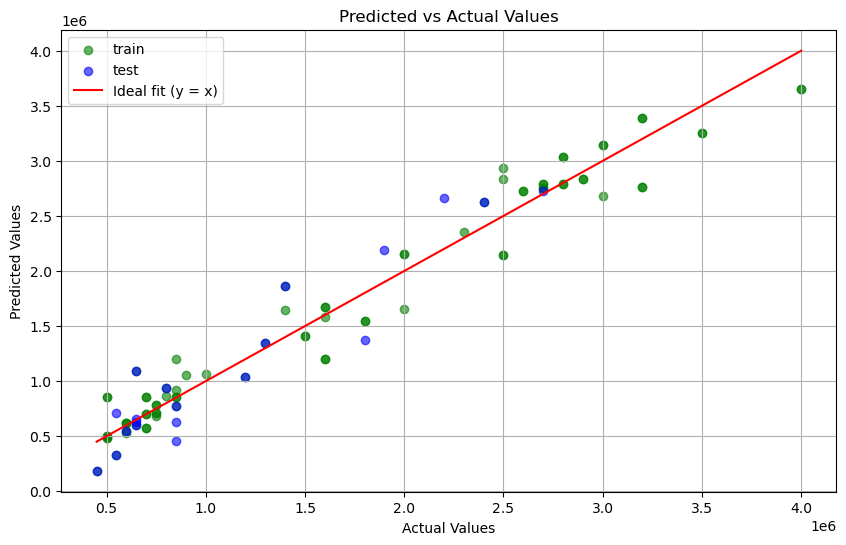

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, predictions_train, color='green', alpha=0.6, label='train')
plt.scatter(y_test, predictions_test, color='blue', alpha=0.6, label='test')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', label='Ideal fit (y = x)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()

**Висновок**:
Показник RMSE для навчального і тренувального наборів данних не дуже сильно відрізняється (210k vs 260k), що говорить про те що навчена модель досить непогано генералізується і робить передбачення добре на даних, які вона ще не бачила (тестовий датсет). На графіку також видно, що зспрогнозовані значення знаходяться досить близько до реальних значень, тому модель можна вважати досить непоганою.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [28]:
scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = pd.DataFrame(scaler.transform(X_train))
scaled_X_train.columns = list(X_train.columns)
scaled_X_test = pd.DataFrame(scaler.transform(X_test))
scaled_X_test.columns = list(X_test.columns)

In [29]:
scaled_X_train

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Model_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
0,0.568813,-0.693871,0.274862,-0.628491,-0.231967,-0.303562,0.975305,0.795395,0.000000,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,3.229330,0.535303
1,-0.323442,-0.039533,-0.018324,0.087196,0.247012,-0.303562,-1.025320,0.795395,0.000000,3.000000,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,-0.994135
2,-0.323442,-0.039533,-0.604696,0.111560,0.910213,-0.303562,0.975305,0.795395,0.000000,3.000000,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,-0.994135
3,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,0.975305,-1.257237,0.000000,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,3.229330,0.535303
4,-1.215697,-0.257646,-1.484254,0.122219,0.910213,-0.303562,0.975305,0.795395,-1.906925,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,2.808717,-0.377964,-0.333333,-0.309662,0.535303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1.461068,0.178580,1.740791,-1.009176,-1.140798,-0.303562,-1.025320,-1.257237,-1.906925,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,3.872983,-0.356034,-0.377964,-0.333333,-0.309662,2.064742
76,-1.215697,-0.911983,-2.070625,4.629524,2.801564,-1.652729,0.975305,0.795395,1.906925,-0.333333,-0.356034,2.808717,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,-0.994135
77,-0.323442,1.814424,-0.604696,0.408494,-0.330219,2.394771,-1.025320,0.795395,-1.906925,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,4.358899,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,0.535303
78,0.568813,-0.693871,0.274862,0.128310,0.247012,-0.303562,-1.025320,0.795395,0.000000,-0.333333,2.808717,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,0.535303


In [30]:
model = train_model_show_rmse(scaled_X_train, y_train)

Loss (RMSE): 210238.30332885525


In [31]:
weights_df = pd.DataFrame({
    'feature': np.append(list(X_test.columns), 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
21,1,1.680000e+06
4,Power,4.977498e+05
10,BMW,2.104331e+05
16,Mercedes,2.090530e+05
9,Audi,2.061793e+05
7,Transmission_Code,1.157292e+05
20,Owner_Type_Codes,4.523994e+04
18,Toyota,1.668788e+04
8,Model_Code,9.461403e+03
5,Seats,-1.928012e+03


**Висновок**
Найважливішими фічами є Power, BMW, Mercedes, Audi, Transmission_Code. Тобто ми можемо сказати, що чим більша потужність двигуна, тим вища ціна. BMW, Mercedes, Audi - це бренд автомобілю, схоже, що найдорожчий, так як якщо ми маємо один із цих брендів то ціна зростає на 206-210к. Те саме з автоматичною коробкою передач, вона дорожча, і її наявність збільшує ціну на 115к.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [32]:
Y = y_train
X = scaled_X_train
X = sm.add_constant(X)
model = sm.OLS(Y.values,X)
results = model.fit()
results.params

const                1.680000e+06
Year                -1.003540e+04
Kilometers_Driven   -9.262699e+04
Mileage             -1.338371e+05
Engine              -2.505247e+04
Power                4.977498e+05
Seats               -1.928012e+03
Fuel_Type_Code      -1.852512e+05
Transmission_Code    1.157292e+05
Model_Code           9.461403e+03
Audi                 2.061793e+05
BMW                  2.104331e+05
Ford                -1.203289e+05
Honda               -6.190186e+04
Hyundai             -1.541724e+05
Mahindra            -1.401280e+05
Maruti              -1.117316e+05
Mercedes             2.090530e+05
Tata                -6.600616e+04
Toyota               1.668788e+04
Volkswagen          -9.336113e+04
Owner_Type_Codes     4.523994e+04
dtype: float64

In [33]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.39
Date:                Wed, 29 May 2024   Prob (F-statistic):           1.98e-33
Time:                        21:14:32   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.74e+0

**Висновок**
Наступні ознаки є статистично значущими: Mileage, Power, Fuel_Type_Code, Transmission_Code, Audi, BMW, Ford, Hyundai, Mahindra, Maruti, Mercedes, Volkswagen.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [34]:
important_features = ['Mileage', 'Power', 'Fuel_Type_Code', 'Transmission_Code', 
                      'Audi', 'BMW', 'Ford', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Volkswagen']

Y = y_train
X = scaled_X_train[important_features]
X = sm.add_constant(X)
model = sm.OLS(Y.values,X)
results = model.fit()
results.params

const                1.680000e+06
Mileage             -1.430094e+05
Power                4.556152e+05
Fuel_Type_Code      -1.337141e+05
Transmission_Code    1.310778e+05
Audi                 2.496895e+05
BMW                  2.949781e+05
Ford                -4.855211e+04
Hyundai             -1.027479e+05
Mahindra            -8.538214e+04
Maruti              -5.117881e+04
Mercedes             2.767291e+05
Volkswagen          -2.375201e+04
dtype: float64

In [35]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Wed, 29 May 2024   Prob (F-statistic):           4.12e-39
Time:                        21:14:45   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.78e+0

**Висновок**
R-squared: усі фічі - 0.959, тільки стат. значущі змінні - 0.951
Adj. R-squared: усі фічі - 0.945, тільки стат. значущі змінні - 0.943

Отже, бачимо, що показники R-squared та Adj. R-squared ми втратили лише 1% якості для моделі, яку ми тренували тільки на стат значущих фічах. 

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [36]:
important_features = ['Mileage', 'Power', 'Fuel_Type_Code', 'Transmission_Code', 
                      'Audi', 'BMW', 'Ford', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Volkswagen',
                      'Kilometers_Driven', 'Honda', 'Tata']

Y = y_train
X = scaled_X_train[important_features]
X = sm.add_constant(X)
model = sm.OLS(Y.values,X)
results = model.fit()
results.params

const                1.680000e+06
Mileage             -1.213232e+05
Power                4.666618e+05
Fuel_Type_Code      -1.629442e+05
Transmission_Code    1.175415e+05
Audi                 1.949556e+05
BMW                  2.092733e+05
Ford                -1.139975e+05
Hyundai             -1.518157e+05
Mahindra            -1.444257e+05
Maruti              -1.159256e+05
Mercedes             2.048056e+05
Volkswagen          -9.072986e+04
Kilometers_Driven   -7.887396e+04
Honda               -7.974914e+04
Tata                -9.700832e+04
dtype: float64

In [37]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Wed, 29 May 2024   Prob (F-statistic):           4.85e-38
Time:                        21:15:01   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.65e+0

**Висновок**
R-squared: усі фічі - 0.959, тільки стат. значущі змінні на рівні 0.25 - 0.958
Adj. R-squared: усі фічі - 0.945, тільки стат. значущі змінні на рівні 0.25 - 0.948

Отже, бачимо, що показники R-squared та Adj. R-squared ми майже таку саму якість, що і на моделі де ми взяли усі фічі. А отже, треба обирати фінальну модель саме цю, з стат. значущі фічами на рівні 0.25. Немає сенсу перевантажувати модельку великою кількістю змінних,які не додають якості.